Social Data Science WS20/21

# Home Assignment 3

### General Instructions

Submit your solution via Moodle until 23.59pm on Tuesday, January 12th.
Late submissions are accepted for 12 hours following the deadline, with 1/4 of the total possible points deducted from the score.

Submit your solutions in teams of up 3-4 members.
Please denote all members of the team with their student ID and full name in the notebook.
Please only make one submission per team.
Only submit the notebook and the image files that you have created in tasks 1b) and 1d), do not submit anything else, like, for instance, any of the datasets that you have used.
Also, do NOT compress/zip your submission!

Cite ALL your sources for coding this home assignment.
In case of plagiarism (copying solutions from other teams or from the internet), ALL team members will be expelled from the course without warning.


### Evaluation and Grading

Evaluation of your submission is done semi-automatically.
Think of it as this notebook being executed once.
Afterwards, some test functions are appended to this file and executed respectively.

Therefore:
* Submit valid _Python3_ code only!
* Restrict yourself to using packages that are automatically installed along with anaconda, plus additional packages that have been introduced in context of this class. An overview of packages that may be used in this assignment can be found in the file 'environment.yaml'.
* Ensure your definitions (functions, classes, methods, variables) follow the specification if
  given. The concrete signature and header of a function is usually specified in the task description and via code skeletons.
* Again, make sure that all your function as well as variable names match with what we have specified! The automated grading will only match these exact names, and everything that is not matching will not be graded.
* This also holds for the plots you have to create and submit - always use the name that is specified! 
* Whenever there is a written task, e.g. task 1d), enter your answer in the specified markdown cell. Do NOT remove the label (e.g. '__A1:__' ) from the markdown cell, as this will have to be parsed by the grading system and matched to your answer. 
* Ensure the notebook does not rely on current notebook or system state!
  * Use `Kernel --> Restart & Run All` to see if you are using any definitions, variables etc. that 
    are not in scope anymore.
  * Do not rename any of the datasets you use, and load it from the same directory that your ipynb-notebook is located in, i.e., your working directory. In particular, when loading your file via a pandas or numpy command, make sure that it has the form `pd.read_csv("example_filename.csv")` instead of `pd.read_csv("C:/User/Path/to/your/Homework/example_filename.csv")` so that the code directly works from our machines.
* Make sure that your code is executable, any task for which the code does not directly run on our machine will be graded with 0 points. Minimize usage of global variables.
* Ensure your code/notebook terminates in reasonable time.
* Textual answers must always be backed by code and may not refer to results that are not part of
  your submission.


**There's a story behind each of these points! Don't expect us to fix your stuff!**

##### List team members, including all student IDs, in the cell below:

In [1]:
# credentials of all team members (you may add or remove items from the dictionary, but keep this dictionary structure)
team_members = [
    {
        'first_name': 'Na Young',
        'last_name': 'Ahn',
        'student_id': 392326
    },
    {
        'first_name': 'Esther',
        'last_name': 'Tala',
        'student_id': 368095
    },
    {
        'first_name': 'Mika',
        'last_name': 'Rosin',
        'student_id': 395049
    },
    {
        'first_name': 'Laurin',
        'last_name': 'Ellenbeck',
        'student_id': 372280
    }
]

In [2]:
# general imports may go here
from typing import List, Optional, Tuple


import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import sklearn as sk
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


###  Task 1: $k$-Means Clustering (45 pts)

We want to apply the $k$-means clustering algorithm introduced in lecture to assign clusters to the dataset in "clusters.txt", which is loaded and plotted in the cell below.

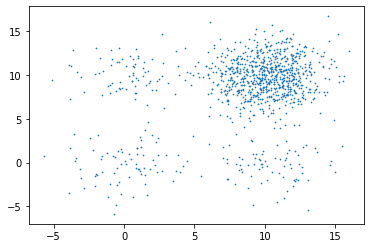

In [3]:
X_clusters = np.loadtxt("clusters.txt")
plt.scatter(X_clusters[:,0],X_clusters[:,1], s=0.5)
plt.show()

#### a) Implementing k-means (20 pts)

Implement the $k$-means clustering algorithm as specified in the cell below.

In [4]:
def k_means(X: np.ndarray, k : int = 2, init_points : Optional[List[int]] = None) -> Tuple[np.ndarray, np.ndarray]:
    """
    :param X: numerical 2D numpy array, each row is a data point
    :param k: number of clusters, ignored if init_points is not None
    :param init_points: list of row indices which indicate the data points that the clusters are initialized with
             -> default is None, indicating that random points from the input data X are initialized as cluster centers
                if specified, k is chosen as the number of cluster centers, and input for k is ignored
    :return: two numpy arrays:
                - labels: 1D numpy array with cluster labels in {1,...,k}
                - centroids: 2D numpy array with k rows which denote the cluster centers
    """
    labels = np.zeros(len(X))
    centroids = init_points
    
    # if init_points are not given or are not the same length as k # choose them randomly
    if init_points == None: 
        init_points = X[np.random.randint(X.shape[0], size=k)]
    # assign x to correct clustercenter
    centroids = init_points
    centroids_temp = np.zeros_like(centroids)
    
    while_counter = 0
    while (centroids_temp != centroids).all() and while_counter < 20: 
        while_counter += 1 
        
        #for the first loop execution
        if np.amax(centroids_temp)!=0:
            centroids = centroids_temp
            
        # compute new labels
        for idx, x in enumerate(X):
            d = [np.linalg.norm(x - center) for center in centroids]
            labels[idx] = np.argmin(d)  
        
        #compute centroids 
        for idx_k, k in enumerate(centroids):
            indices = [idx for idx, x in enumerate(X) if labels[idx] == idx_k]
            if len(indices) == 0:
                centroids_temp[idx_k] = k
                continue
            mean_k = X_sum = np.sum(X[indices], axis=0)/len(X[indices])
            centroids_temp[idx_k] = mean_k
            np.round(centroids_temp, decimals=5, out=centroids_temp)
            
    return labels, centroids 

#### b) Application with random initialization (5 pts)

Apply your implementation from a) 10 times on the data from clusters.txt, choosing $k = 4$ and random initalization of cluster centers. For each run, scatterplot the data as above, with different colors indicating the different clusters, and save your plots into a single file "clusters1b.png" which contains 10 subplots. How often do you think the resulting clusters are appropriate?
Write your answer, including a brief explanation, into cell ***A1b)***!

<ipython-input-5-ec0a76883162>:21: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


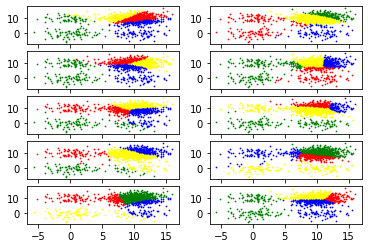

In [5]:
fig = plt.figure()
for i in range(10):
    labels, centroids = k_means(X_clusters, k=4)
    k_zero = np.asarray([x for idx, x in enumerate(X_clusters) if labels[idx] == 0])
    k_one = np.asarray([x for idx, x in enumerate(X_clusters) if labels[idx] == 1 ])
    k_two = np.asarray([x for idx, x in enumerate(X_clusters) if labels[idx] == 2 ])
    k_three = np.asarray([x for idx, x in enumerate(X_clusters) if labels[idx] == 3 ])

    
    fig.add_subplot(5, 2, i+1)
    if len(k_zero)!=0:
        plt.scatter(k_zero[:,0],k_zero[:,1], s=0.5, c="red")
    if len(k_one)!=0:
        plt.scatter(k_one[:,0],k_one[:,1], s=0.5, c="green")      
    if len(k_two)!=0:
        plt.scatter(k_two[:,0],k_two[:,1], s=0.5, c="yellow")
    if len(k_zero)!=0:
        plt.scatter(k_three[:,0],k_three[:,1], s=0.5, c="blue")

fig.savefig("clusters1b.png")
fig.show()

**A1b):** In the run stored in the pdf file "clusters1b.png" in 1 out of 10 times, the clusters are appropriate. This is probably due to the random initialization since the performance of k-means is dependent on the initialization points. 
Since this data sample has one big blob while the others seem to be smaller, the chance is higher to choose a point which meant to belong to the big blob. This way the plot is often divided into different classes. 


#### c) k-means++ (15 pts)

To improve the performance of the $k$-means clustering algorithm, a common approach is to not initialize cluster centers completely at random, but rather to make sure that the initial cluster centers are relatively far away from each other. A very popular initialization scheme is provided by the $k$-means++ algorithm, which works as follows:

Let $X$ the set of data points, and $\mathcal{D}(x)$ denote the shortest distance from a data point to the closest center we have already chosen. Then, the k-means++ initialization consists of the following steps.
1. Take one center $c_1$, chosen uniformly at random from $X$.
2. Take a new center $c_i$, choosing $x \in X$ with probability $$p(x) = \frac{D(x)^2}{\sum_{x\in X} D(x)^2}$$
3. Repeat Step 2 until we have taken $k$ centers altogether.

Implement this initialization scheme in a function ```init_k_means_pp```, and an extra helper function ```calc_probability``` which computes the probability distribution in step 2, using the signatures in the cells below. Use Euclidean distance to measure distance between any pair of points in the data.  

In [6]:
# Helper function for calculating the probability in step 2
# computes the distribution of probabilities of each individual point in the data to be chosen as initial cluster centroid

def calc_probability(X: np.ndarray, curr_centroids: List[int]) -> np.ndarray:
    """
    :param X: 2D numpy array, consisting of all the data points we want to cluster
    :param curr_centroids: list of row indices which indicate the points that are already chosen as cluster centers
    :return: 1D numpy array, containing the probabilities of each point in the data to be chosen as next cluster center
    """
    
    #compute p(x)  
    d_array = []
    for idx, x in enumerate(X):
        temp = [np.linalg.norm(x - c) for c in curr_centroids]
        D = min(temp)
        d_array.append(D**2)

    p = [d/sum(d_array) for d in d_array]
        
    return p

# calc_probability(X_clusters, [12 ,  13])

In [7]:
def init_k_means_pp(X: np.ndarray, k: int) -> List[int]:
    """
    :param X: numerical 2D numpy array, where each row represents a data point
    :param k: number of clusters 
    :
    :return: list of k row indices which indicate the data points that the clusters are initialized with
    """
    centers = []
    for i in range(k):
        if i == 0: 
            centers.append(X[np.random.randint(0,X.shape[0])].tolist())
            continue
        p = calc_probability(X,centers)
        # append new center 
        centers.append(X[np.argmax(p)].tolist())
    return centers
# init_k_means_pp(X_clusters, 5)

#### d) Improved Clustering (5 pts)

Apply the initializations from c) and the implementation from a) to rerun the experiment from b). That is, run the $4$-means clustering algorithm ten times on the given data, using the initialization from ```k_means_pp```, and scatterplot each clustering using different colors for different clusters. Save the resulting plots into a file named "clusters1d.png". Do you observe a different behavior of the clusterings than in task b)? Write your answer into cell **1d)**!


<ipython-input-8-08aefab9eb81>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


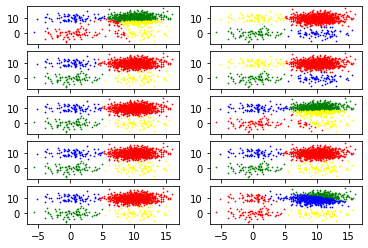

In [8]:
fig = plt.figure()
for i in range(10):
    labels, centroids = k_means(X_clusters, k=4, init_points=init_k_means_pp(X_clusters, 4))
    k_zero = np.asarray([x for idx, x in enumerate(X_clusters) if labels[idx] == 0])
    k_one = np.asarray([x for idx, x in enumerate(X_clusters) if labels[idx] == 1 ])
    k_two = np.asarray([x for idx, x in enumerate(X_clusters) if labels[idx] == 2 ])
    k_three = np.asarray([x for idx, x in enumerate(X_clusters) if labels[idx] == 3 ])

    fig.add_subplot(5, 2, i+1)
    if len(k_zero)!=0:
        plt.scatter(k_zero[:,0],k_zero[:,1], s=0.5, c="red")
    if len(k_one)!=0:
        plt.scatter(k_one[:,0],k_one[:,1], s=0.5, c="green")      
    if len(k_two)!=0:
        plt.scatter(k_two[:,0],k_two[:,1], s=0.5, c="yellow")
    if len(k_zero)!=0:
        plt.scatter(k_three[:,0],k_three[:,1], s=0.5, c="blue")
        #pdf.savefig()
fig.savefig('clusters1d.png')       
fig.show()

**A1d):** In the analyzed run 8 out of 10 times was appropriate. In comparison to the k-means algorithm with random initialization, one can see that the improved initialization process led to a more stable and better quality approach.

### Task 2: Helping Santa (40 pts)

Santa Claus has gotten old and cannot deliver the christmas presents by himself anymore. Luckily, he has his team of 20 elves that are happy to carry all the presents out for him.
To distribute presents in an efficient way, he wants to partition the households to deliver presents to in an optimal way, by clustering of the locations that the presents are delivered to.
A map with the coordinates of each household to deliver can be found in "xmas.txt", and it is loaded and plotted in the cell below.

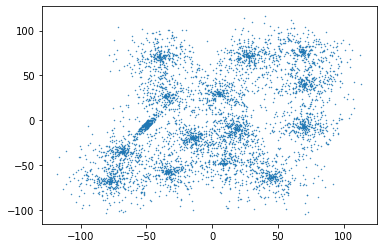

In [9]:
X_mas = np.loadtxt("xmas.txt")
plt.scatter(X_mas[:,0],X_mas[:,1], s=0.2)
plt.show()

#### a) The Silhouette Coefficient (10 pts)

Since Santa cannot judge the quality of a clustering by looking at a map, he needs to apply some quality measure that quantifies how good a clustering is.  

One such measure, which both evaluates how compact clusters are among themselves, and how well different clusters are separated, is the **silhouette coefficient**.
Assuming that all data points $x_1,\dots ,x_n$ are partitioned into $k$ clusters $C_1, \dots, C_k$, we can compute two coefficients for each data point $x_i$. On the one hand, assuming that $x_i \in C_l$,
$$
a(x_i) := \frac{\sum_{x_j\in C_l} d(x_i,x_j)}{|C_l| - 1}
$$
measures the compactness of the cluster $C_l$ to which $x_i$ belongs, and 
$$
b(x_i) := \min_{C_m\not= C_l}\left\{ \frac{\sum_{x_j\in C_m} d(x_i,x_j)}{|C_m|} \right\}
$$
captures the degree to which $x_i$ is separated from other clusters. Note that in these formulas, $d$ represents a distance function that can be chosen individually for the application at hand.
From these two values, we can compute the silhouette coefficient of $x_i$ via
$$
s(x_i) = \frac{b(x_i) - a(x_i)}{\max\{a(x_i),b(x_i)\}}.
$$
Note that the value of this coefficient lies between -1 and 1, with 1 being the optimum, and negative values indicating a bad clustering, where on expectation $x_i$ is further away from the data points in its own cluster than from points in any other cluster.  
To evaluate the quality of the **full clustering** of a dataset, one can then compute the **average silhouette coefficient of all points in a dataset**.  
Note that this measure does not require a fixed $k$, unlike the objective function in the k-means clustering algorithm, and thus it can also be used to find an optimal $k$.

Write a function ```silhouette_score``` that computes this silhouette score of a full clustering, using the _Euclidean distance_ as the distance function $d$. Use the signature which is specified in the cell below.

In [10]:
def silhouette_score(X: np.ndarray, labels: np.ndarray) -> float:
    """
    :param X: numerical 2D numpy array, where each row represents a data point
    :param labels: 1D numpy array containing the corresponding cluster labels in {1,...,k}
    :
    :return: resulting silhouette score as float
    """
    # compute distance between points in the same class
    in_class_dist = np.zeros(X.shape[0])
    
    X_copy = X
    for idx, x in enumerate(X):
        for idxx, y in enumerate(X):
            if labels[idxx] == labels[idx]:
                in_class_dist[idx] += np.linalg.norm(x-y)
    # compute a for every point 
    a = [i/(np.count_nonzero(labels == labels[idx]) - 1) for idx, i in enumerate(in_class_dist)]
    
    # compute b for every point 
    b = np.zeros(X.shape[0])
    
    for idx, x in enumerate(X):
        for idxy, y in enumerate(X):
            if labels[idxy] != labels[idx]:
                i = 0
                temp = 0
                for idxz, z in enumerate(X):
                    if labels[idxy] == labels[idxz]:
                        temp += np.linalg.norm(z-y)
                        i += 1 
                #reasisation of the min part of the b function
                if b[idx] == 0:
                    b[idx] = temp/i
                elif b[idx] > temp/i:
                    b[idx] = temp/i; 
    
    # comput s for all points 
    s = [(b[idx] - a[idx]) / max(a[idx], b[idx])for idx, x in enumerate(X)]
                        
    return s

#### b) Finding an Optimal Clustering (30 pt)

On christmas eve, Santa wants to send an appropriate number of his elves out to deliver all the presents, and he wants to send at least 10 elves out, because the limited capacity of their sleighs does not allow for a smaller number. However, he is also fine with not sending all of his 20 elves out, since all the elves that are not delivering presents could prepare Santa's own traditional christmas party in the meantime.  
Thus, he decides to simply send out the number of elves between 10 and 20 that yields the best clustering with respect to the silhouette score. 

Find an optimal clustering of the households on the christmas map consisting of between 10 and 20 clusters.
Save the corresponding vector of optimal cluster labels into a variable ```xmas_cluster_labels```. Also provide all code that you used to find this optimum in the cell(s) below.  
Note that you do not need to imlement any clustering method yourself, but may resort to the algorithms provided by ```sklearn.cluster```, as well as the implemention of the silhouette score provided by ```sklearn.metrics```.
You will receive full marks if the clustering you found yields a silhouette score (using Euclidean distance) that is at least as good as our baseline which was determined using $k$-means clustering .

In [11]:
xmas_cluster_labels = 15

In [12]:
s_bewertung = []
s_impl_arr = []

for k in range(10,21):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_mas)
    s = sk.metrics.silhouette_score(X_mas, kmeans.labels_, metric='euclidean')
    s_bewertung.append(s)
xmas_cluster_labels = 10 + np.argmax(s_bewertung) 
print("xmas_cluster_labels = ", xmas_cluster_labels)

xmas_cluster_labels =  15


In [13]:
## TEST
#for k in range(10,21):
#    print("k =", k)
#    kmeans = KMeans(n_clusters=k, random_state=0).fit(X_mas)
#    s = silhouette_score(X_mas, kmeans.labels_)
#    s_bewertung.append(s)
#xmas_cluster_labels_ = 10 + np.argmax(s_bewertung)
#print("xmas_cluster_labels_ = ", xmas_cluster_labels_)

### Task 3: Assessing Algorithmic (Un)Fairness (55 pts)

In this task we are working with the _German Credit_ dataset, which classifies people described by a set of attributes as good or bad credit risks. The given data is already an adaptation from the original data that can be found at the UCI ML library. A documentation regarding the categorical values can also be found here: https://archive.ics.uci.edu/ml/datasets/Statlog+(German+Credit+Data)  
We adapt the target "credit" attribute such that a '1' indicates a good credit risk, and a '0' indicates a bad credit risk, and further preprocessed the data by dummy-coding the categorical variables.  
In this dataset, age-based discrimination was found to exist, so we choose ```age``` as the _sensitive attribute_ in the data, with people of age 25 or younger forming the *protected group*, and people older than 25 years forming the *unprotected group*.

In [14]:
df3 = pd.read_csv ("german_credit.csv")
df3.credit = df3.credit.replace(2,0)
df3 = pd.get_dummies(df3, drop_first = True)
df3.head()

,month,credit_amount,investment_as_income_percentage,residence_since,age,number_of_credits,people_liable_for,credit,status_A12,status_A13,...,property_A124,installment_plans_A142,installment_plans_A143,housing_A152,housing_A153,skill_level_A172,skill_level_A173,skill_level_A174,telephone_A192,foreign_worker_A202
0,6,1169,4,4,67,2,1,1,0,0,...,0,0,1,1,0,0,1,0,1,0
1,48,5951,2,2,22,1,1,0,1,0,...,0,0,1,1,0,0,1,0,0,0
2,12,2096,2,3,49,1,2,1,0,0,...,0,0,1,1,0,1,0,0,0,0
3,42,7882,2,4,45,1,2,1,0,0,...,0,0,1,0,1,0,1,0,0,0
4,24,4870,3,4,53,2,2,0,0,0,...,1,0,1,0,1,0,1,0,0,0


#### a) Analysing Age Disparity (5 pts)

As indicated above, we want to split all individuals in the data in two age groups, namely people that are older than 25 years, and people that are not. How many people are in each group, and what is the ratio of good credit scores among each group? Save the absolute numbers of old and young people in the data into variables ```n_old``` and ```n_young```, and the relative amount of old and young people that have a good credit score into variables ```r_good_old``` and ```r_good_young```! Do you observe some disparities beween the groups? Write your answer into cell **A3a)**!

In [15]:
# absolute amount of old and young
n_old = sum(df3.age > 25) # unprotected group
n_young = sum(df3.age <= 25) # protected group
print(n_old)
print(n_young)

n_good_old = sum((df3.age > 25) & (df3.credit == 1))
n_good_young = sum((df3.age <= 25) & (df3.credit == 1))

# relative amount of old and young with good credit score
r_good_old = n_good_old / n_old
r_good_young = n_good_young / n_young
print(r_good_old)
print(r_good_young)

# disparity?
#print(r_good_young/r_good_old)

#r_bad_old = (sum((df3.age > 25) & (df3.credit == 0))) / n_old
#r_bad_young = (sum((df3.age <= 25) & (df3.credit == 0))) /n_young
#print(r_bad_old)
#print(1-r_good_old)


810
190
0.7283950617283951
0.5789473684210527


**A3a):** 
We observe a greater percentage of old with good credit score (approximately, 0.728) than young with good credit score (approximately, 0.579). The ratio of the old with good credit score is approximately 0.79 times than the ratio of the young with good credit score.

#### b) Measuring Algorithmic Fairness (10 pts)

In this task we want to measure algorithmic unfairness both in terms of the _relative chance_ (also commonly known as *disparate impact*) measure which has been introduced in lecture, as well as the groupwise accuracies. 
Implement functions that compute these measures, using the function signatures specified in the cell below. 

You may assume that both the class attribute as well as the sensitive attribute is binary, with '1' indicating the 'good class' and the unprotected group, respectively.

In [16]:
def relative_chance(y_pred: np.ndarray, s_arr: np.ndarray) -> float:
    """
    :param y_pred: 1D numpy array of binary predicted classes
    :param s_arr: binary 1D numpy array representing the sensitive attribute
    :
    :return: resulting relative chance score
    """

    positive_attr = s_arr==1 # if sensitive attribute: unprotected, old elif class attribute: good
    negative_attr = s_arr==0 # if sensitive attribute: protected, young elif class attribute: bad

    # 1-pr(a)=pr(a^c)
    return (np.sum(y_pred[negative_attr])/np.sum(negative_attr)) / (np.sum(y_pred[positive_attr]/np.sum(positive_attr)))


def groupwise_accuracy(y: np.ndarray, y_pred: np.ndarray, s_arr: np.ndarray) -> Tuple[float, float]:
    """
    :param y: 1D numpy array of binary true classes
    :param y_pred: 1D numpy array of binary predicted classes
    :param s_arr: binary 1D numpy array representing the sensitive attribute
    :
    :return: tuple of accuracy scores:
    :       - First element is accuracy on the instances from the protected class, 
    :       - Second element is accuracy on the instances from the unprotected class,
    """
    # TODO insert your code here

    # accuracy = (true pos. + true neg.)/all
    # ternary operator
    unprotected = s_arr==1 # positive sensitive attribute i.e. old, unprotected group
    protected = s_arr==0 # negative sensitive attribute i.e. young, protected group
    true = y==y_pred
    acc_protected = np.sum(true[protected])/np.sum(protected)
    acc_unprotected = np.sum(true[unprotected])/np.sum(unprotected)

    return acc_protected,acc_unprotected

#### c) Predicting Credit Score (10 pts)

Split the dataset in a way that the first 700 elements are training data, and the remaining 300 elements are test data. Train a logistic regression classifier ```logit3c``` on the training data, using all attributes other than the target ```class``` variable as predictor. Make sure to scale the data appropriately. Compute the accuracy, the tuple of groupwise accuracies, and the relative chance score on the test data, and save the resulting values into variables ```acc_3c```, ```gr_acc_3c``` and ```rc_3c```! How would you judge the performance of your classifier? Write your answer into cell __A3c)__!

In [17]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

y = df3.credit.to_numpy()
# do not scale before test train split (avoid data leak)
X = preprocessing.scale(df3.drop("credit", axis=1) )

X_train = X[:700]
y_train = y[:700]
X_test = X[700:]
y_test = y[700:]
logit3c = LogisticRegression(max_iter = 10000).fit(X_train,y_train)
y_pred = logit3c.predict(X_test)

In [18]:
s_arr = (df3[700:].age>25).to_numpy().astype(int)
acc_3c = np.sum(y[700:]==y_pred)/len(y_pred)
#acc_3c_test = accuracy_score(df3[700:].credit, y_pred)
gr_acc_3c = groupwise_accuracy(y[700:],y_pred,s_arr)
rc_3c = relative_chance(y_pred, s_arr)

print(acc_3c)
#print(acc_3c_test)
print(gr_acc_3c)
print(rc_3c)


0.78
(0.6724137931034483, 0.8057851239669421)
0.7323917828319882


**A3c):** We achieve an accuracy score of 0.78 from the classifier. However, for groupwise accuracy score we get approximately (0.6724, 0.8057). The predictive accuracy of the classifier is unimpressive and also can be misleading. We have groups of different sizes, namely, size of unprotected group (n_old = 810) > size of protected group (n_young = 190).
The model gives a biased result by predicting people in the larger group. Thus, we should always check with the accuracy groupwise. 
Our relative chance score from the classifer yields 0.732, which - according to the four-fifths rule - is below acceptable difference of 80 percent. Also this is lower compared to initial disparity, or relative chance score from task 3a), of approximately 0.794. Therefore, we can infer that the classifier was not successful in improving fairness. 

#### d) Omitting the Sensitive Attribute (10 pts)

Train a logistic regression classifier ```logit3d``` on the scaled training data where the age attribute has been erased, and recompute the accuracy, the tuple of groupwise accuracies, and the relative chance score on the test data. Save the resulting values into variables ```acc_3d```, ```gr_acc_3d``` and ```rc_3d```! Do the values change significantly? Write your answer into cell __A3d)__!

In [19]:
X_new = preprocessing.scale(df3.drop(["credit" , "age"], axis=1))
X_new_train = X_new[:700]
X_new_test = X_new[700:]
logit3d = LogisticRegression(max_iter = 10000).fit(X_new_train,y_train)
y_pred = logit3d.predict(X_new_test)

In [20]:
acc_3d = np.sum(y[700:]==y_pred)/len(y_pred)
gr_acc_3d = groupwise_accuracy(y[700:],y_pred,s_arr)
rc_3d = relative_chance(y_pred, s_arr)

print(acc_3d)
print(gr_acc_3d)
print(rc_3d)

0.7866666666666666
(0.6724137931034483, 0.8140495867768595)
0.7767791636096845


**A3d):** The values have not changed significantly even after removing the sensitive attribute, "age". This could be due to the fact that other attributes in the data that are correlated with the sensitive attribute and indirectly indicate data in sensitive attribute, such as "residence_since".

#### e) Massaging the Training Data (15 pts)

Recall the method of massaging training data which has been introduced in lecture. In this method, the binary labels on the trainng data are flipped so that afterwards, the fraction of positively labeled instances among the unprotected group on the one hand, and protected group on the other hand, is nearly equal.

The exact procedure to carry this out is as follows:
1. Train a Classifier on the full training data that estimates the probability that an individual instance is classed as positive.
2. We select the set $M_0$ of instances in the protected group whose labels are negative, and the set $M_1$ of instances in the unprotected group whose labels are positive.
3. We rank the instances in $M_0$ by their confidence scores in DESCENDING order, and the instances in $M_1$ by their confidence scores in ASCENDING order.
4. For a given number $m$, we flip the labels of the top $m$ instances of these rankings.

Usually, one wants to massage the training data in a way that the ratio of positive labels per group is roughly identical.  Letting  $\epsilon$ denote the difference of the positive rates between the groups, (i.e.,  ```r_good_old - r_good_young```), and $N_0,N_1$ denote the number of respective instances in the protected and in the unprotected group  (i.e.,  ```n_young``` and ```n_old```), this (approximate) equality would be achieved when flipping 
$m^* = \epsilon \cdot \frac{N_0 \cdot N_1}{N_0 + N_1}$
labels.

Write a function ```create_massaged_labels``` which implements this procedure, using the function signature specified in the cell below. Apply your function on the _training_ data, flipping $m^* = \epsilon \cdot \frac{N_0 \cdot N_1}{N_0 + N_1}$ labels. Save the resulting massaged training labels into a variable ```y_msg```!

In [21]:
def create_massaged_labels(X: np.ndarray, s_arr: np.ndarray, y: np.ndarray, m: int, clf=LogisticRegression()) -> np.ndarray:
    """
    :param X: 2D numpy array of training features
    :param s_arr: binary 1D numpy array representing the sensitive attribute
    :param y:  binary 1D numpy array of true classes
    :param m: number of labels to flip
    :param clf: sklearn classifier that should be used to produce the confidence scores. 
    :           You may assume that it contains a fit() and predict_proba() function. 
    :           Defaults to logistic regression classifier with standard parameters
    :
    :return: 1D numpy array of massaged training labels, needs to have the same length as y
    """
    X = preprocessing.scale(df3.drop(["credit", "age"], axis=1) )
    
    logit3c = clf(max_iter = 10000).fit(X,y)
    y_score = clf.predict_proba(X)[:,1] # probability that an individual instance is classed as positive.
    df3.insert(0,"y_score", y_score, True)
    
    m_0 = df3[(s_arr <= 25) & (df3.credit == 0)].sort_values('y_score', ascending = False)
    m_1 = df3[(s_arr > 25) & (df3.credit == 1)].sort_values('y_score', ascending = True)
    
    
    for i, row in m_0.iloc[:m].iterrows():
        row['credit'] == 1 - row.credit
        
    for i, row in m_1.iloc[:m].iterrows():
        row['credit'] == 1 - row.credit
        
    return 


In [22]:
y_msg = ...

#### f) Predicting on Massaged Data (5pts)

Train a logistic regression classifier ```logit3f``` on the scaled training data using the massaged labels ```y_msg```, and apply your model on the test data. Once again, recompute the accuracy, the tuple of groupwise accuracies, and the relative chance score on the test data, and save the resulting values into variables ```acc_3f```, ```gr_acc_3f``` and ```rc_3f```. How have the resulting metrics changed compared to the previous subtasks? Write your answer into cell __A3f)__!



In [23]:
logit3f = ...

In [24]:
acc_3f = ...
gr_acc_3f = ...
rc_3f = ...

**A3f):** _Write your answer here!_

### Task 4: Fair Classification with the Two Naive Bayes Algorithm (40 pts)

In this final task we are going to work on the _Ricci_ dataset, which describes the outcome of an exam that determined eligibility for promotion for firefighters from a US city. In this test, 18 firefighters received high marks. However, the city administration invalidated the exam because an insufficient number of racial minorities would be promoted if the exam was used. This resulted in a "reverse discrimination" lawsuit against the city by these firefighters. Lower courts supported this decision, but the Supreme Court forced the city to revalidate the exams.

For the purposes of studying fair machine learning, in this task we want to predict who gets promoted while achieving fairness with respect to the sensitive attribute ```Race```. The unprotected class, i.e. the white population, have attribute value 1, and all non-whites have attribute value 0.

In [25]:
df4 = pd.read_csv("ricci.csv")
df4.head()

,Oral,Written,Race,Combine,Class,Position_Captain,Position_Lieutenant
0,89.52,95,1,92.808,1,1,0
1,80.00,95,1,89.000,1,1,0
2,82.38,87,1,85.152,1,1,0
3,88.57,76,1,81.028,1,1,0
4,76.19,84,1,80.876,1,1,0


To measure algorithmic fairness in this task, we will be using the **Calders-Verwer (CV) score**, which, similar to the _relative chance_ score, essentially compares the positive positive prediction rates per group, only that this measure computes a difference between these rates.  
It returns values between 0 and 2, with 1 indicating a perfectly balanced prediction, and values lower than 1 indicating a bias against the protected/unprivileged group. The measure is implemented in the cell below.

In [26]:
def cv_score(y_pred, s_arr):
    """
    :param y_pred: 1D numpy array of binary predicted classes
    :param s_arr: binary 1D numpy array representing the sensitive attribute
    :
    :return: resulting cv score
    """
    pos_mask = s_arr==1
    neg_mask = s_arr==0

    return 1.0 - np.sum(y_pred[pos_mask])/np.sum(pos_mask) + np.sum(y_pred[neg_mask])/np.sum(neg_mask)

#### a) Biased Classification (5 pts)

Train a Gaussian Naive Bayes classifier on the full dataset which learns to predict the ```Class``` attribute using all other columns in the data. Apply your model on the training data, and compute both the accuracy as well as the CV score of the resulting predictions with respect to the sensitive attribute ```Race```. Save the resulting accuracy in a variable called ```acc_4a```, and the CV score into a variable ```cv_4a```. Give a brief comment regarding the resulting scores in cell __A4a)__!

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

X = df4.drop(labels=['Class'], axis=1)
y = df4['Class']

gaussianNB = GaussianNB()
gaussianNB_model = gaussianNB.fit(X, y)
y_pred = gaussianNB_model.predict(X)

acc_4a = accuracy_score(df4['Class'], y_pred)
print(acc_4a)

cv_4a = cv_score(y_pred, df4['Race'])
print(cv_4a)

0.9152542372881356
0.5341176470588235


**A4a):** There is a significant discrepancy between the accuracy score and the cv score. The low cv score may indicate unfairness.

#### b) The Two Naive Bayes Algorithm by Calders and Verwer (30 pts)

In lecture we have introduced the Two Naive Bayes algorithm by Calders and Verwer. Its main idea is to train two different Naive Bayes models corresponding to both values of a binary sensitive attribute $S$, and to then adapt the prior probabilities $P(Y|S)$ of each of these models until the predictions on the training data become fair.
More precisely, in training, we first fit two different models, namely one for the privileged class $S=1$ and one for the non-privileged class $S=0$, to obtain the conditional probabilities $P(X_i|Y,S=s)$, $s=0,1$, and the priors $P(Y|S=s)$, $s=0,1$ from the training data. After these initial fits, we evaluate the model on the training data, and if we do not observe fair predictions, i.e. predictions for which the CV score is at least $1-\epsilon$, we adapt the priors $P(Y|S=s)$ until this is the case. This adaptation is carried out as follows:

We initialize $N(Y=j, S=s)$ as the number of training samples with class $j$ and sensitive attribute value $s$, and $N(Y=1)$ the number of samples with class $1$ in the data. Further, let $\Delta$ denote an adaptation rate, which is given as input.  
Then we conduct the following iteration:

1. cv_score <- CV score of the predicted classes by the current model.
2. while cv_score $< 1 - \epsilon$:
    * $n_{pos}$ <- number of predicted positive samples from the current model.
    * if $n_{pos} < N(Y=1)$:
           N(Y=1, S=0) <- N(Y=1, S=0) + ΔN(Y=0, S=1)
           N(Y=0, S=0) <- N(Y=0, S=0) - ΔN(Y=0, S=1) 
      else:
           N(Y=0, S=1) <- N(Y=0, S=1) + ΔN(Y=1, S=0)
           N(Y=1, S=1) <- N(Y=1, S=1) - ΔN(Y=1, S=0)
    * if any of the N(Y, S) is negative then cancel the previous update of $N(Y; S)$ and abort
    * Recalculate priors $P(Y|S=i)$  and cv_score based on updated $N(Y, S)$
    
Note that the priors $P(Y|S=s)$ are calculated via
$$P(Y|S=s) = \frac{N(Y, S=s)}{N(S=s)},$$
where $N(S=s)$ denotes the number of samples in the data with sensitive attribute value $s$.

**Task description:** Implement a class that runs the Two Naive Bayes algorithm, using the signatures and specifications in the cell below! Apply Gaussian Naive Bayes models to fit your data. In particular, you do not need to differentiate between continuous and discrete data as in exercise 8, and you can use the ```GaussianNB``` class from ```sklearn.naive_bayes``` to fit the two individual models. Note that this class also has an attribute that stores the prior probabilities and can be overwritten easily.
Further, you may assume that all input data is valid, i.e. you do not need to check whether for instance the feature matrix ```X``` has as many rows as the class vector ```y``` or the sensitive attribute vector ```s_arr```.

In [28]:
import numpy as np
from sklearn.naive_bayes import GaussianNB

class TwoNaiveBayes:
    """
    :class implementing the Two Naive Bayes Algorithm by Calders and Verwer
    :
    :class attributes:
    :attr nb0: Gaussian Naive Bayes classifier used to make predictions on minority class
    :attr nb1: Gaussian Naive Bayes classifier used to make predictions on privileged class
    :attr delta: adaptation rate used in the iteration in step 2
    :attr eps: fairness tolerance, we consider a classification fair if the cv score is at least 1 - eps
    :
    :class methods:
    :function __init__: constructor of the class which initializes the model
    :function fit: function that fits model parameters on training data
    :function predict: function that utilizes trained model parameters to make predictions on unseen target data
    """
    
    def __init__(self, delta: Optional[float] = 0.01, eps: Optional[float] = 0.05):
        """
        : Constructor of the class, we only initialize internal parameters here.
        : Do not change anything about the constructor!
        """
        self.nb0 = GaussianNB()
        self.nb1 = GaussianNB()
        self.delta = delta
        self.eps = eps

    def fit(self, X: np.ndarray, s_arr: np.ndarray, y: np.ndarray):
        """
        :param X: 2D numerical numpy array reprenting the feature matrix without the sensitive attribute
        :param s_arr: binary 1D numpy array representing the sensitive attribute
        :param  y: binary 1D numpy array representing the class labels to train on
        :
        :return nothing, this function only fits internal parameters
        """
        
        # From funcrion 'cv_score'
        pos_mask = s_arr==1
        neg_mask = s_arr==0
        
        self.nb0.fit(X[neg_mask], y[neg_mask])
        self.nb1.fit(X[pos_mask], y[pos_mask])
    
    def predict(self, X: np.ndarray, s_arr: np.ndarray) -> np.ndarray:
        """
        :param X: 2D numerical numpy array reprenting the feature matrix without the sensitive attribute
        :param s_arr: binary 1D numpy array representing the sensitive attribute to consider when predicting
        :
        :return: 1D numpy vector of (fair) class labels
        """
        
        # From funcrion 'cv_score'
        pos_mask = s_arr==1
        neg_mask = s_arr==0
        
        pred_0 = self.nb0.predict(X[neg_mask])
        pred_1 = self.nb1.predict(X[pos_mask])
        
        pred = np.ndarray(shape=(s_arr.size,), dtype='int')
        
        pred[neg_mask] = pred_0
        pred[pos_mask] = pred_1
        
        cv = cv_score(pred, s_arr)
        
        # Skip the initilization for the while loop and the while loop, if it would not be used.
        if(cv >= (1 - self.eps)):
            return pred
        
        unique, frequency = np.unique(y, return_counts=True)
        y_frequency = dict(zip(unique, frequency))
        # Dict access to ensure correct valute for positive frequency
        n_y_1 = y_frequency[1]
        
        unique, frequency = np.unique(s_arr, return_counts = True)
        s_frequency = dict(zip(unique, frequency))
        # Dict access to ensure correct valute for positive and negative frequency
        n_s_0 = s_frequency[0]
        n_s_1 = s_frequency[1]
        
        unique, frequency = np.unique(np.column_stack((y, s_arr)), axis=0, return_counts = True)
        n_0_0 = frequency[unique.tolist().index([0, 0])]
        n_0_1 = frequency[unique.tolist().index([0, 1])]
        n_1_0 = frequency[unique.tolist().index([1, 0])]
        n_1_1 = frequency[unique.tolist().index([1, 1])]        
        
        while cv < (1 - self.eps):
            # Backup of values
            b_0_0 = n_0_0
            b_0_1 = n_0_1
            b_1_0 = n_1_0
            b_1_1 = n_1_1
            
            n_pos = len(np.where(pred == 1)[0])
            
            if(n_pos < n_y_1):
                n_1_0 = n_1_0 + self.delta * n_0_1
                n_0_0 = n_0_0 - self.delta * n_0_1
            else:
                n_0_1 = n_0_1 + self.delta * n_1_0
                n_1_1 = n_1_1 - self.delta * n_1_0
                
            if(n_0_0 < 0 or n_0_1 < 0 or n_1_0 < 0 or n_1_1 < 0):
                # Load old values
                # Only present because the algrotithm demands it.
                # Could be removed with no effect.
                n_0_0 = b_0_0
                n_0_1 = b_0_1
                n_1_0 = b_1_0
                n_1_1 = b_1_1
                # Negativity, break out of loop.
                break
                
            # Recalculate priors  
            p_0_0 = n_0_0 / n_s_0  
            p_0_1 = n_0_1 / n_s_1
            p_1_0 = n_1_0 / n_s_0
            p_1_1 = n_1_1 / n_s_1

            self.nb0.class_prior_ = [p_0_0, p_1_0]
            self.nb1.class_prior_ = [p_0_1, p_1_1]

            pred_0 = self.nb0.predict(X[neg_mask])
            pred_1 = self.nb1.predict(X[pos_mask])

            pred[neg_mask] = pred_0
            pred[pos_mask] = pred_1

            # Update cv
            cv = cv_score(pred, s_arr)
            
        
        return pred

####  c) Fair Prediction (5 pts)
Apply your implementation from b) on the Ricci dataset. In particular, fit your model on the full dataset, and compute the predictions on this whole dataset. Compute the CV score and the accuracy resulting from these predictions. Save the resulting accuracy in a variable called ```acc_4c```, and the CV score into a variable ```cv_4c```.
Compare these outcomes to the results from task a). What do you observe? Write your answer into cell **A4c)**!

In [29]:
X = df4.drop(labels=['Class', 'Race'], axis=1)
y = df4['Class']
s_arr = df4['Race'].to_numpy()

twoNaiveBayes = TwoNaiveBayes()
twoNaiveBayes.fit(X, s_arr, y)
y_pred = twoNaiveBayes.predict(X, s_arr)

acc_4c = accuracy_score(df4['Class'], y_pred)
print(acc_4c)

cv_4c = cv_score(y_pred, s_arr)
print(cv_4c)

0.8728813559322034
0.9547058823529411


**A4c):** Compared to the other results in 4a, we observe a lower accuracy score and a higher cv score. This supports that there is an inverse relationship between fairness and utility.